In [12]:
pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.1 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=b0b4a4297f14b340c897dedc602bac0580bb7373bfb9c42dd57df96a5a91c25c
  Stored in directory: /Use

In [13]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import warnings
import datetime
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import datetime
import yfinance as yf


In [47]:
def correlated_pairs(df):
    corr = df.corr() 
    plt.figure(figsize=(10, 8))
    high_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack()
    print(high_corr[high_corr.abs() > 0.8])
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()

In [40]:
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2025, 9, 1)

tickers = ['SURYODAY', 'FINOPB', 'DCBBANK', 'UJJIVANSFB', 
           'EQUITASBNK', 'CSBBANK', 'AUBANK', 'IDFCFIRSTB']

tickers = [i+'.NS' for i in tickers]
print(tickers)

df = yf.download(tickers,start = start,end=end)['Close']
df.reset_index(inplace=True)
df.set_index('Date',inplace=True)
df

[*********************100%***********************]  8 of 8 completed

['SURYODAY.NS', 'FINOPB.NS', 'DCBBANK.NS', 'UJJIVANSFB.NS', 'EQUITASBNK.NS', 'CSBBANK.NS', 'AUBANK.NS', 'IDFCFIRSTB.NS']


Ticker,AUBANK.NS,CSBBANK.NS,DCBBANK.NS,EQUITASBNK.NS,FINOPB.NS,IDFCFIRSTB.NS,SURYODAY.NS,UJJIVANSFB.NS
Date,,,,,,,,
2022-01-03,529.999512,237.250000,76.694519,58.153675,381.500000,49.488022,146.850006,17.690042
2022-01-04,545.223389,251.750000,77.173851,57.958195,385.200012,49.139164,144.850006,17.597183
2022-01-05,581.765564,255.050003,79.618500,58.007065,412.100006,49.637531,144.199997,18.432932
2022-01-06,580.621338,253.649994,79.762291,57.909328,415.899994,49.637531,145.250000,18.525795
2022-01-07,607.462158,259.399994,79.522614,55.612507,424.350006,49.039490,145.949997,19.779419
...,...,...,...,...,...,...,...,...
2025-08-25,749.599976,385.899994,122.230003,53.310001,266.500000,70.279999,125.309998,43.750000
2025-08-26,745.250000,389.549988,122.120003,52.240002,269.950012,68.760002,123.580002,42.790001
2025-08-27,745.250000,389.549988,122.120003,52.240002,269.950012,68.760002,123.580002,42.790001


Ticker         Ticker       
CSBBANK.NS     DCBBANK.NS       0.806250
               IDFCFIRSTB.NS    0.814448
               UJJIVANSFB.NS    0.916219
DCBBANK.NS     UJJIVANSFB.NS    0.821734
EQUITASBNK.NS  IDFCFIRSTB.NS    0.882112
               SURYODAY.NS      0.840166
               UJJIVANSFB.NS    0.849730
IDFCFIRSTB.NS  UJJIVANSFB.NS    0.936891
dtype: float64


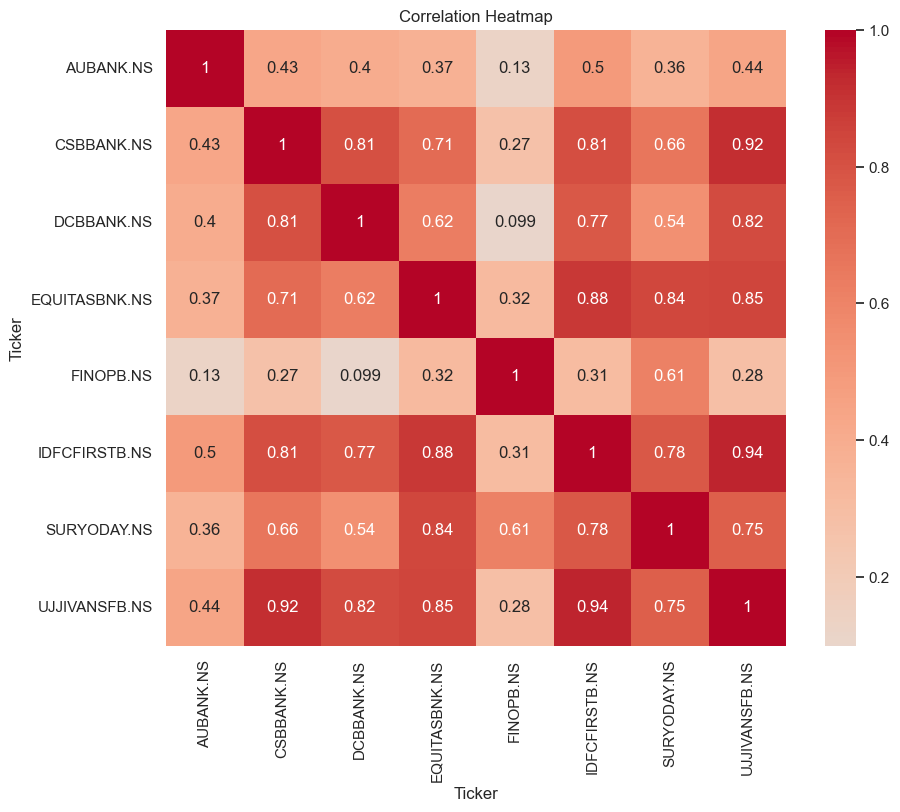

In [48]:
correlated_pairs(df)

In [69]:
##Null hypothesis , they are not cointegrated
def cointegrated_pairs(df,pvalue_threshold=0.05):
    stocks = df.columns
    pairs = []
    for i in range(0,len(stocks)):
        for j in range(i+1,len(stocks)):
            temp=[]
            result = coint(df[stocks[i]],df[stocks[j]])
            pvalue = result[1]
            score = result[0]
            if pvalue<pvalue_threshold:
                pairs.append([stocks[i],stocks[j],float(score),float(pvalue)])
    return pairs

In [70]:
cointegrated_pairs = cointegrated_pairs(df,0.05)
cointegrated_pairs

[['CSBBANK.NS', 'UJJIVANSFB.NS', -3.5867648968420616, 0.025440585882733152],
 ['FINOPB.NS', 'SURYODAY.NS', -3.3467923025274438, 0.048613450412639425]]

## Plotting Graphs of the cointegrated stocks

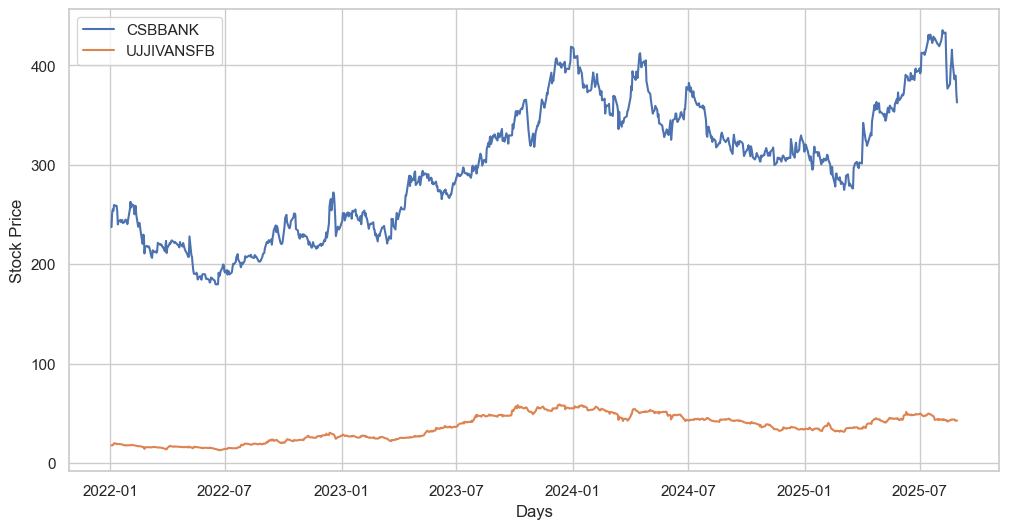

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(df['CSBBANK.NS'],label = 'CSBBANK')
plt.plot(df['UJJIVANSFB.NS'],label='UJJIVANSFB')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

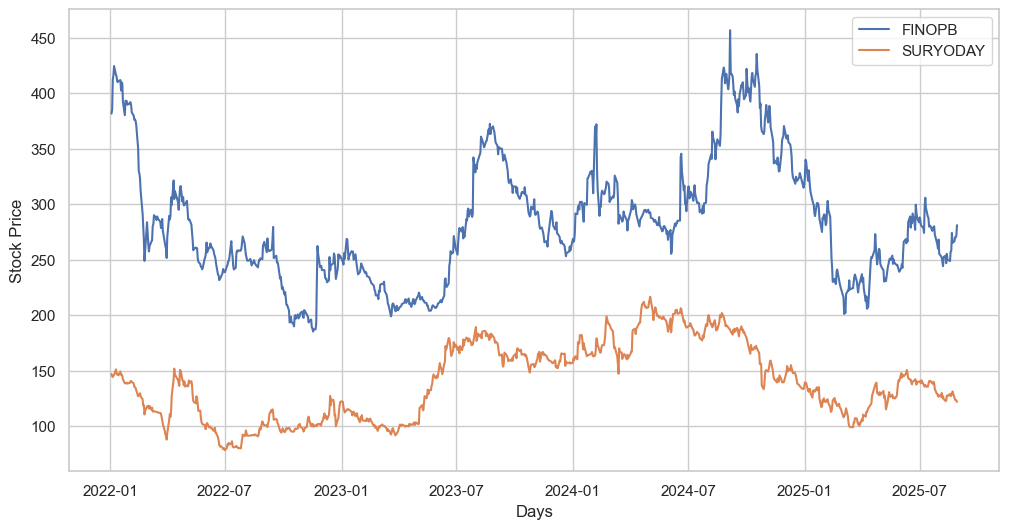

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(df['FINOPB.NS'],label = 'FINOPB')
plt.plot(df['SURYODAY.NS'],label='SURYODAY')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [80]:
## Now we will do separate analysis for FINOPB and SURYODAY

In [87]:
Fin = df['FINOPB.NS']
Sur = df['SURYODAY.NS']
print(coint(Fin,Sur))


(np.float64(-3.3467923025274438), np.float64(0.048613450412639425), array([-3.90859596, -3.34289731, -3.04914492]))


In [86]:
Fin

Date
2022-01-03    381.500000
2022-01-04    385.200012
2022-01-05    412.100006
2022-01-06    415.899994
2022-01-07    424.350006
                 ...    
2025-08-25    266.500000
2025-08-26    269.950012
2025-08-27    269.950012
2025-08-28    271.450012
2025-08-29    280.950012
Name: FINOPB.NS, Length: 905, dtype: float64

In [90]:
X = sm.add_constant(Fin) 
model = sm.OLS(Sur, X).fit()

# Coefficient beta
b = model.params['FINOPB.NS']
print("Beta:", b)

residuals = model.resid
# print(residuals)

Beta: 0.3786335982877997


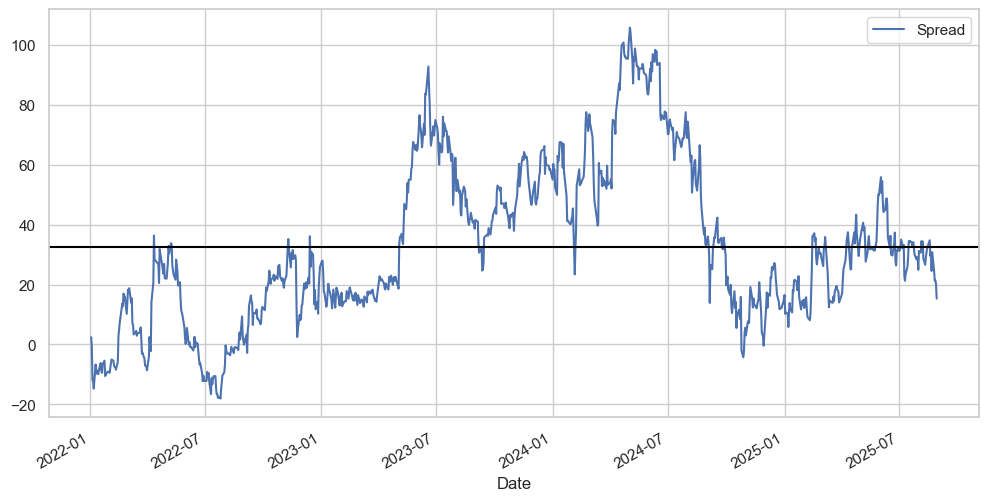

In [91]:
spread = Sur - b * Fin
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

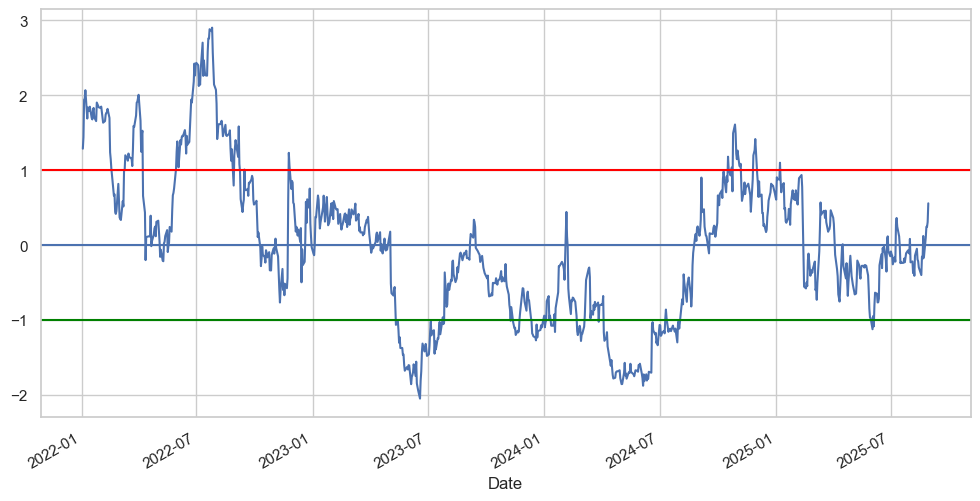

In [95]:
ratio = Fin/Sur
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

In [96]:
## Most of the part lies in between the z scores and converges to the mean eventually

Our strategy: Since we are relying on stock price of A and B
and consider our strategy is to bet on spread I will short A and Long B
so if ratio of t+1 is more than than t this means the spread has increased where A has increased in price and B has decreased

In [101]:
### Train Test Split
ratios = df['FINOPB.NS'] / df['SURYODAY.NS'] 
print(len(ratios) * .80 ) 

724.0


In [102]:
train = ratios[:724]
test = ratios[724:]

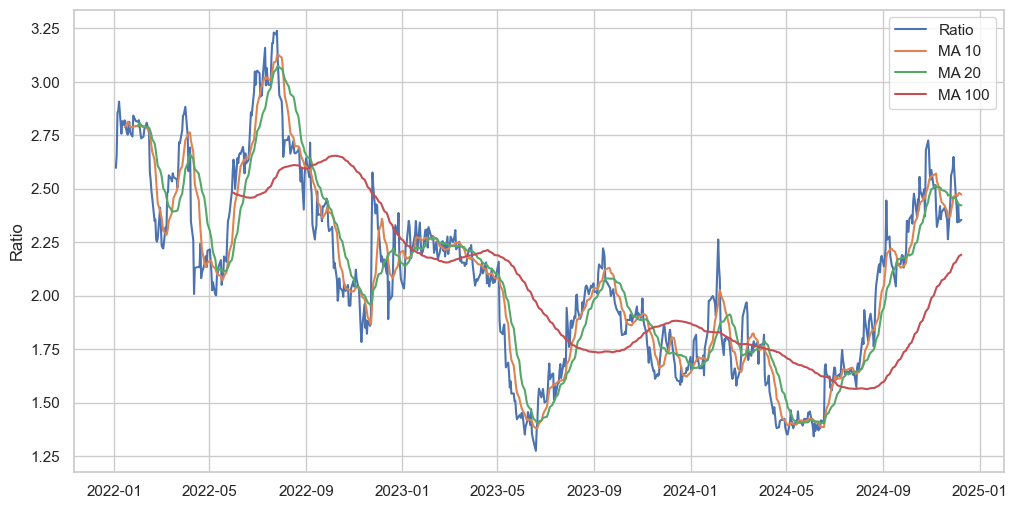

In [106]:
## Now lets create some features that we can use for predicting the ratio
### Moving average, deviations
## remember to make all the changes on training not on test the test should be independent of the training

mavg10 = train.rolling(window=10, center=False).mean()
mavg20 = train.rolling(window=20, center=False).mean()
mavg50 = train.rolling(window=50, center=False).mean()
mavg100 = train.rolling(window=100, center=False).mean()



std_50 = train.rolling(window=50, center=False).std()
std_100 = train.rolling(window=100, center=False).std()

zscore_50_10 = (mavg10 - mavg50)/std_50

zscore_100_10 = (mavg10 - mavg100)/std_100

plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(mavg10.index, mavg10.values)
plt.plot(mavg20.index, mavg20.values)
plt.plot(mavg100.index, mavg100.values)

plt.legend(['Ratio', 'MA 10', 'MA 20', 'MA 100'])

plt.ylabel('Ratio')
plt.show()

In [105]:
## from the graph we can see that the MA 10 and MA20 works well but the AM 100 fails to capture the immediate changes

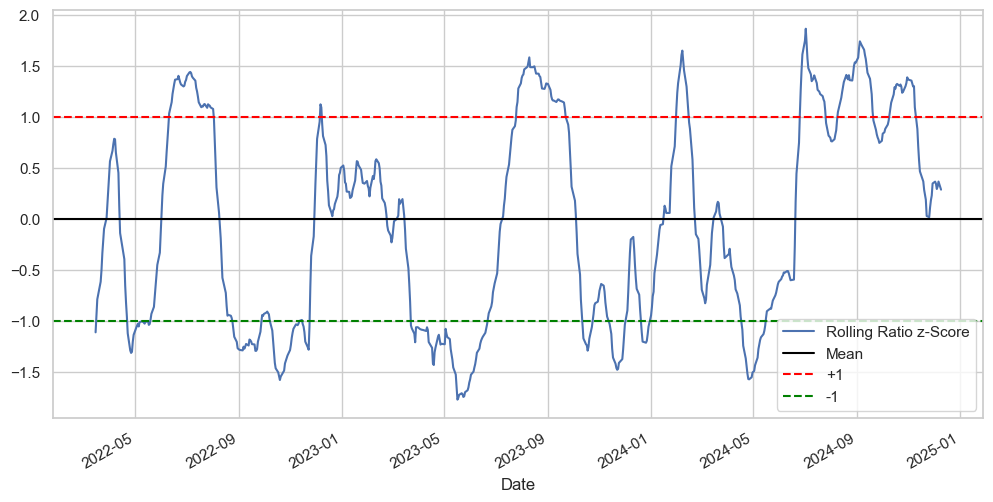

In [107]:
plt.figure(figsize=(12,6))
zscore_50_10.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

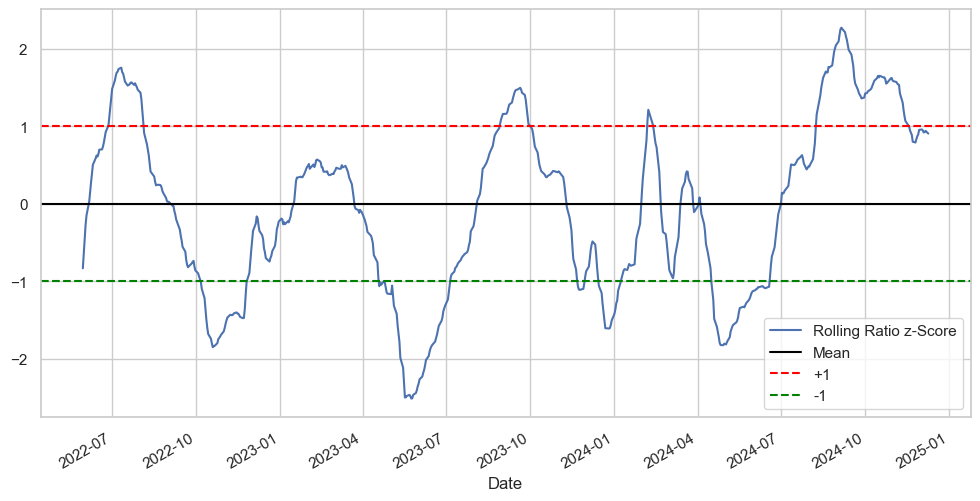

In [108]:
plt.figure(figsize=(12,6))
zscore_100_10.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

We buy when ratio zscore_50_10 is below -1 and sell when ratio of zscore_50_10 is above 1
because when ratio zscore is less than -1 this means ratio has gone 1 standard deviation below its mean value 
and thus the mean reversal will happen and ratio will increase and vice-versa

In [111]:
zscore_50_10

Date
2022-01-03         NaN
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
                ...   
2024-12-03    0.344567
2024-12-04    0.293111
2024-12-05    0.317859
2024-12-06    0.366178
2024-12-09    0.286874
Length: 724, dtype: float64

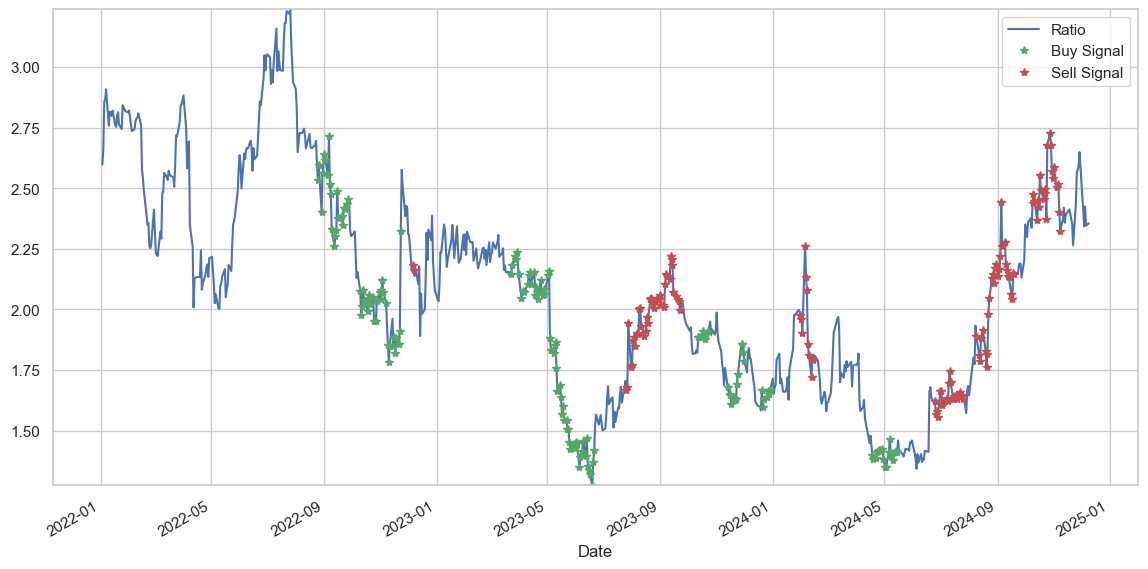

In [110]:
plt.figure(figsize=(14,7))

train.plot()
buy = train.copy()
sell = train.copy()
buy[zscore_50_10>-1] = 0
sell[zscore_50_10<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='*')
sell[160:].plot(color='r', linestyle='None', marker='*')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

### Now lets look at each individually

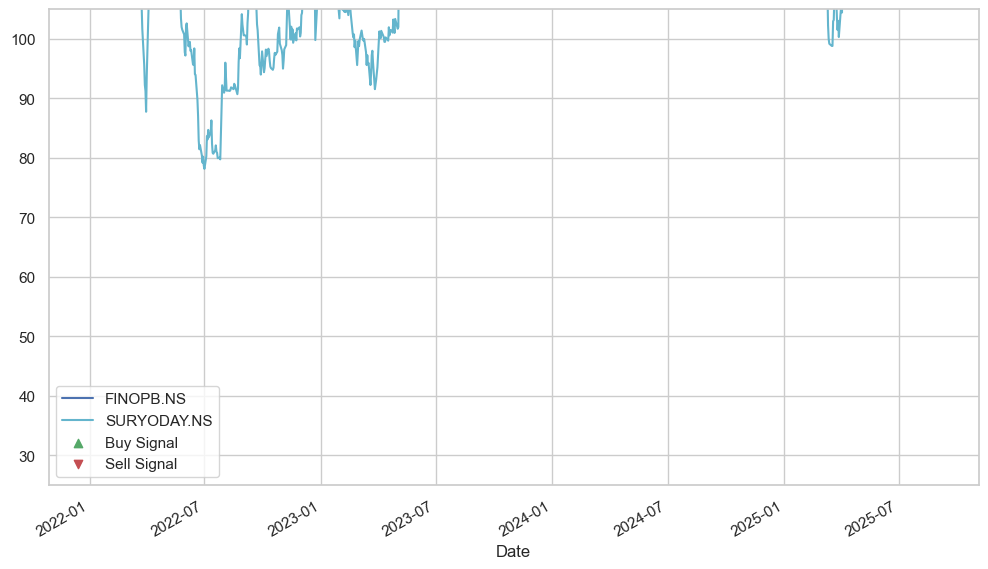

In [114]:
plt.figure(figsize=(12,7))
S1 = df['FINOPB.NS']
S2 = df['SURYODAY.NS']

S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(25, 105)

plt.legend(['ADBE', 'MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()